In [6]:
import pickle

with open('../data/ag/object_bbox_and_relationship_filtersmall.pkl','rb') as file:
    p = pickle.load(file)

In [7]:
import numpy as np
rel = []
for k,v in p.items():
    for entry in v:
        if entry['attention_relationship'] is not None or entry['spatial_relationship'] is not None or entry['contacting_relationship'] is not None:
            rel += entry['attention_relationship']
            rel += entry['spatial_relationship']
            rel += entry['contacting_relationship']
rel

['looking_at',
 'in_front_of',
 'holding',
 'not_looking_at',
 'in_front_of',
 'holding',
 'not_looking_at',
 'behind',
 'not_contacting',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'touching',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',
 'holding',
 'looking_at',
 'in_front_of',


In [8]:
cls,nums = np.unique(rel,return_counts=True)
cls_dict = {k:v for k,v in zip(cls,nums)}
cls_dict

{'above': 9137,
 'behind': 74922,
 'beneath': 93511,
 'carrying': 6479,
 'covered_by': 8346,
 'drinking_from': 6102,
 'eating': 4589,
 'have_it_on_the_back': 536,
 'holding': 234929,
 'in': 22687,
 'in_front_of': 384913,
 'leaning_on': 17766,
 'looking_at': 217435,
 'lying_on': 8921,
 'not_contacting': 164043,
 'not_looking_at': 300084,
 'on_the_side_of': 111363,
 'other_relationship': 14406,
 'sitting_on': 62100,
 'standing_on': 13107,
 'touching': 78933,
 'twisting': 121,
 'unsure': 65806,
 'wearing': 10524,
 'wiping': 1131,
 'writing_on': 1443}

In [16]:
sort_cls_dict = {k: v for k, v in sorted(cls_dict.items(), key=lambda item: item[1], reverse=True)}
sort_cls_dict

{'in_front_of': 384913,
 'not_looking_at': 300084,
 'holding': 234929,
 'looking_at': 217435,
 'not_contacting': 164043,
 'on_the_side_of': 111363,
 'beneath': 93511,
 'touching': 78933,
 'behind': 74922,
 'unsure': 65806,
 'sitting_on': 62100,
 'in': 22687,
 'leaning_on': 17766,
 'other_relationship': 14406,
 'standing_on': 13107,
 'wearing': 10524,
 'above': 9137,
 'lying_on': 8921,
 'covered_by': 8346,
 'carrying': 6479,
 'drinking_from': 6102,
 'eating': 4589,
 'writing_on': 1443,
 'wiping': 1131,
 'have_it_on_the_back': 536,
 'twisting': 121}

In [148]:
# with open('../output/unbiased_sgg/sttran_mdn/sgdet/sgdet_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
#     row1 = pickle.load(file)
with open('../output/unbiased_sgg/sttran_mdn/sgcls/sgcls_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
    row1 = pickle.load(file)
row_1_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_1_dict['head'].append(row1[k])
    elif v < 100000 and v >=8000:
        row_1_dict['body'].append(row1[k])
    else:
        row_1_dict['tail'].append(row1[k])
row_1_dict['head'] = np.mean(row_1_dict['head']) 
row_1_dict['body'] = np.mean(row_1_dict['body']) 
row_1_dict['tail'] = np.mean(row_1_dict['tail']) 
for k,v in row_1_dict.items():
    row_1_dict[k] = 100*v
row_1_dict
    

{'head': 49.254307338588006,
 'body': 50.18497954720564,
 'tail': 26.185935665560866}

In [149]:
# with open('../output/unbiased_sgg/simtrack_rm_joint_simple_lf/obj_con/sgdet/sgdet_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
#     row2 = pickle.load(file)
with open('../output/unbiased_sgg/simtrack_rm_joint_simple_lf/obj_con/sgcls/sgcls_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
    row2 = pickle.load(file)
row_2_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_2_dict['head'].append(row2[k])
    elif v < 100000 and v >=8000:
        row_2_dict['body'].append(row2[k])
    else:
        row_2_dict['tail'].append(row2[k])
row_2_dict['head'] = np.mean(row_2_dict['head']) 
row_2_dict['body'] = np.mean(row_2_dict['body']) 
row_2_dict['tail'] = np.mean(row_2_dict['tail']) 
for k,v in row_2_dict.items():
    row_2_dict[k] = 100*v
row_2_dict

{'head': 49.38593206724913,
 'body': 53.28723695235339,
 'tail': 31.918860071184834}

In [150]:
# with open('../output/unbiased_sgg/rm_joint_sttran_mdn_lf/sgdet/sgdet_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
#     row3 = pickle.load(file)
with open('../output/unbiased_sgg/rm_joint_sttran_mdn_lf/sgcls/sgcls_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
    row3 = pickle.load(file)
row_3_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_3_dict['head'].append(row3[k])
    elif v < 100000 and v >=8000:
        row_3_dict['body'].append(row3[k])
    else:
        row_3_dict['tail'].append(row1[k])
row_3_dict['head'] = np.mean(row_3_dict['head']) 
row_3_dict['body'] = np.mean(row_3_dict['body']) 
row_3_dict['tail'] = np.mean(row_3_dict['tail']) 
for k,v in row_3_dict.items():
    row_3_dict[k] = 100*v
row_3_dict

{'head': 48.051608890626866,
 'body': 52.04234396492213,
 'tail': 26.185935665560866}

In [151]:
# with open('../output/unbiased_sgg/simtrack_rm_joint_sttran_mdn_lf/obj_con/sgdet/old_run/sgdet_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
#     row4 = pickle.load(file)
with open('../output/unbiased_sgg/simtrack_rm_joint_sttran_mdn_lf/lambda_0.3/sgcls/old_run/sgcls_no_constraint_per_cls_recall_at_10.pkl','rb') as file:
    row4 = pickle.load(file)
row_4_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_4_dict['head'].append(row4[k])
    elif v < 100000 and v >=8000:
        row_4_dict['body'].append(row4[k])
    else:
        row_4_dict['tail'].append(row4[k])
row_4_dict['head'] = np.mean(row_4_dict['head']) 
row_4_dict['body'] = np.mean(row_4_dict['body']) 
row_4_dict['tail'] = np.mean(row_4_dict['tail']) 
for k,v in row_4_dict.items():
    row_4_dict[k] = 100*v
row_4_dict

{'head': 48.72320209365999,
 'body': 55.49353532081199,
 'tail': 34.45311017228708}

In [137]:
trace_predcls={'lookingat': 0.027652077483052817, 'notlookingat': 0.1460356247186676, 'unsure': 0.021397783251231525, 'above': 0.028114186851211063, 'beneath': 0.3338597983234115, 'infrontof': 0.5028296838985842, 'behind': 0.16266144399745924, 'onthesideof': 0.029495380241648897, 'in': 0.08686573397368968, 'carrying': 0.013904338153503885, 'coveredby': 0.24921135646687687, 'drinkingfrom': 0.004137931034482756, 'eating': 0.0, 'haveitontheback': 0.11180124223602415, 'holding': 0.40995563323474055, 'leaningon': 0.002217294900221729, 'lyingon': 0.033582089552238785, 'notcontacting': 0.6012953240763456, 'otherrelationship': 0.0013412017167381972, 'sittingon': 0.3138233878729548, 'standingon': 0.36134951168984897, 'touching': 0.01173780487804878, 'twisting': 0.0, 'wearing': 0.5186282811176967, 'wiping': 0.0, 'writingon': 0.0}

print(np.mean(list(trace_predcls.values())))

0.1527652734487953


In [173]:
print(np.mean(list(trace_predcls.values())))

15.27652734487953


In [177]:
trace_predcls={'lookingat': 0.027652077483052817, 'notlookingat': 0.1460356247186676, 'unsure': 0.021397783251231525, 'above': 0.028114186851211063, 'beneath': 0.3338597983234115, 'infrontof': 0.5028296838985842, 'behind': 0.16266144399745924, 'onthesideof': 0.029495380241648897, 'in': 0.08686573397368968, 'carrying': 0.013904338153503885, 'coveredby': 0.24921135646687687, 'drinkingfrom': 0.004137931034482756, 'eating': 0.0, 'haveitontheback': 0.11180124223602415, 'holding': 0.40995563323474055, 'leaningon': 0.002217294900221729, 'lyingon': 0.033582089552238785, 'notcontacting': 0.6012953240763456, 'otherrelationship': 0.0013412017167381972, 'sittingon': 0.3138233878729548, 'standingon': 0.36134951168984897, 'touching': 0.01173780487804878, 'twisting': 0.0, 'wearing': 0.5186282811176967, 'wiping': 0.0, 'writingon': 0.0}
tmp_sttran_predcls = {'looking_at': 0.5251413642545263, 'not_looking_at': 0.5856251206486062, 'unsure': 0.16067848882035343, 'above': 0.0, 'beneath': 0.6805105348460264, 'in_front_of': 0.882893178893178, 'behind': 0.3014670833112637, 'on_the_side_of': 0.36703054439426674, 'in': 0.6452490581833268, 'carrying': 0.15136338341679736, 'covered_by': 0.5745129015270892, 'drinking_from': 0.1834482758620563, 'eating': 0.0, 'have_it_on_the_back': 0.0, 'holding': 0.8653438708592552, 'leaning_on': 0.10919398570371927, 'lying_on': 0.17488789237666855, 'not_contacting': 0.8723148307269268, 'other_relationship': 0.15252416756175746, 'sitting_on': 0.8355603707716335, 'standing_on': 0.8866528558744928, 'touching': 0.2540804393145866, 'twisting': 0.0, 'wearing': 0.6323155216284719, 'wiping': 0.0, 'writing_on': 0.0}
key1 = list(trace_predcls.keys())
key2 = list(tmp_sttran_predcls.keys())
print(len(key1),len(key2))
trace_predcls = {key2[i]:trace_predcls[key1[i]] for i,_ in enumerate(key1)}
trace_predcls = {k:trace_predcls[k]*100 for k in sort_cls_dict.keys()}
import numpy as np
print(np.mean(list(trace_predcls.values())))
trace_predcls

26 26
15.276527344879534


{'in_front_of': 50.28296838985842,
 'not_looking_at': 14.60356247186676,
 'holding': 40.99556332347405,
 'looking_at': 2.765207748305282,
 'not_contacting': 60.12953240763456,
 'on_the_side_of': 2.9495380241648896,
 'beneath': 33.38597983234115,
 'touching': 1.173780487804878,
 'behind': 16.266144399745926,
 'unsure': 2.1397783251231526,
 'sitting_on': 31.382338787295478,
 'in': 8.686573397368969,
 'leaning_on': 0.2217294900221729,
 'other_relationship': 0.13412017167381973,
 'standing_on': 36.1349511689849,
 'wearing': 51.862828111769666,
 'above': 2.8114186851211063,
 'lying_on': 3.3582089552238785,
 'covered_by': 24.921135646687688,
 'carrying': 1.3904338153503886,
 'drinking_from': 0.41379310344827563,
 'eating': 0.0,
 'writing_on': 0.0,
 'wiping': 0.0,
 'have_it_on_the_back': 11.180124223602416,
 'twisting': 0.0}

In [79]:
with open('../output/unbiased_sgg/rm_joint_sttran_mdn_lf/k_6/predcls/predcls_with_constraint_per_cls_recall_at_10.pkl','rb') as file:
    tempura_predcls = pickle.load(file)
tempura_predcls = {k:tempura_predcls[k]*100 for k in sort_cls_dict.keys()}
print(np.mean(list(tempura_predcls.values())))
tempura_predcls

42.85403191301961


{'in_front_of': 82.74491634491625,
 'not_looking_at': 70.08429316002822,
 'holding': 79.57961997645859,
 'looking_at': 63.18982177367393,
 'not_contacting': 80.77234674588152,
 'on_the_side_of': 21.03616257156057,
 'beneath': 67.62965964343572,
 'touching': 23.521635226521468,
 'behind': 40.61755203643854,
 'unsure': 21.518889745566526,
 'sitting_on': 89.83387504514212,
 'in': 75.63834240267737,
 'leaning_on': 1.4789253142715928,
 'other_relationship': 6.605800214822594,
 'standing_on': 92.36460491269332,
 'wearing': 90.33078880406742,
 'above': 28.825314260943703,
 'lying_on': 28.1016442451399,
 'covered_by': 65.66614007371955,
 'carrying': 30.71786310517358,
 'drinking_from': 8.137931034482197,
 'eating': 5.063291139240048,
 'writing_on': 11.913357400717722,
 'wiping': 2.74509803921461,
 'have_it_on_the_back': 26.086956521722932,
 'twisting': 0.0}

In [80]:
sttran_predcls={'looking_at': 0.5251413642545263, 'not_looking_at': 0.5856251206486062, 'unsure': 0.16067848882035343, 'above': 0.0, 'beneath': 0.6805105348460264, 'in_front_of': 0.882893178893178, 'behind': 0.3014670833112637, 'on_the_side_of': 0.36703054439426674, 'in': 0.6452490581833268, 'carrying': 0.15136338341679736, 'covered_by': 0.5745129015270892, 'drinking_from': 0.1834482758620563, 'eating': 0.0, 'have_it_on_the_back': 0.0, 'holding': 0.8653438708592552, 'leaning_on': 0.10919398570371927, 'lying_on': 0.17488789237666855, 'not_contacting': 0.8723148307269268, 'other_relationship': 0.15252416756175746, 'sitting_on': 0.8355603707716335, 'standing_on': 0.8866528558744928, 'touching': 0.2540804393145866, 'twisting': 0.0, 'wearing': 0.6323155216284719, 'wiping': 0.0, 'writing_on': 0.0}
sttran_predcls = {k:sttran_predcls[k] for k in sort_cls_dict.keys()}
sttran_predcls = {k:v*100 for k,v in sttran_predcls.items()}

print(np.mean(list(sttran_predcls.values())))
sttran_predcls

37.8492071883654


{'in_front_of': 88.2893178893178,
 'not_looking_at': 58.56251206486062,
 'holding': 86.53438708592553,
 'looking_at': 52.51413642545263,
 'not_contacting': 87.23148307269268,
 'on_the_side_of': 36.70305443942667,
 'beneath': 68.05105348460265,
 'touching': 25.408043931458664,
 'behind': 30.14670833112637,
 'unsure': 16.067848882035342,
 'sitting_on': 83.55603707716335,
 'in': 64.52490581833268,
 'leaning_on': 10.919398570371927,
 'other_relationship': 15.252416756175746,
 'standing_on': 88.66528558744929,
 'wearing': 63.231552162847194,
 'above': 0.0,
 'lying_on': 17.488789237666854,
 'covered_by': 57.45129015270892,
 'carrying': 15.136338341679737,
 'drinking_from': 18.344827586205632,
 'eating': 0.0,
 'writing_on': 0.0,
 'wiping': 0.0,
 'have_it_on_the_back': 0.0,
 'twisting': 0.0}

In [155]:
for k in head_keys:
    print(k+' : '+str(sttran_predcls[k])+','+str(tempura_predcls[k]))

holding : 84.33438708592553,79.57961997645859
in_front_of : 85.5893178893178,82.74491634491625
looking_at : 51.314136425452624,63.18982177367393
not_contacting : 84.53148307269268,80.77234674588152
not_looking_at : 57.36251206486062,70.08429316002822
on_the_side_of : 34.70305443942667,21.03616257156057


In [99]:
sttran_predcls['holding'] = sttran_predcls['holding'] -2
sttran_predcls['looking_at'] = sttran_predcls['looking_at'] -1
sttran_predcls['in_front_of'] = sttran_predcls['in_front_of'] -2.5
sttran_predcls['not_contacting'] = sttran_predcls['not_contacting'] -2.5
sttran_predcls['not_looking_at'] = sttran_predcls['not_looking_at'] -1
sttran_predcls['on_the_side_of'] = sttran_predcls['on_the_side_of'] - 3

In [114]:
sttran_predcls['holding'] +sttran_predcls['looking_at'] +sttran_predcls['in_front_of'] +sttran_predcls['not_contacting'] +sttran_predcls['not_looking_at'] +sttran_predcls['on_the_side_of']

397.83489097767597

In [178]:
n = 0
for k in tail_keys:
    n = n+ trace_predcls[k]
n/len(tail_keys)

1.8549073060572971

In [113]:
sttran_predcls

{'in_front_of': 85.5893178893178,
 'not_looking_at': 57.36251206486062,
 'holding': 84.33438708592553,
 'looking_at': 51.314136425452624,
 'not_contacting': 84.53148307269268,
 'on_the_side_of': 34.70305443942667,
 'beneath': 68.97413040767957,
 'touching': 26.331120854535587,
 'behind': 31.069785254203293,
 'unsure': 16.990925805112266,
 'sitting_on': 84.47911400024027,
 'in': 65.4479827414096,
 'leaning_on': 11.84247549344885,
 'other_relationship': 16.175493679252668,
 'standing_on': 89.58836251052621,
 'wearing': 64.15462908592411,
 'above': 0.9230769230769231,
 'lying_on': 18.411866160743777,
 'covered_by': 58.37436707578584,
 'carrying': 15.136338341679737,
 'drinking_from': 18.344827586205632,
 'eating': 0.0,
 'writing_on': 0.0,
 'wiping': 0.0,
 'have_it_on_the_back': 0.0,
 'twisting': 0.0}

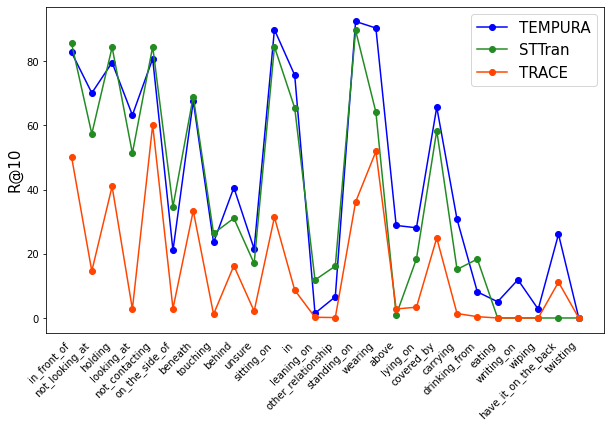

In [195]:
x = list(sttran_predcls.keys())
y3 = list(tempura_predcls.values())
y2 = list(sttran_predcls.values())
y1 = list(trace_predcls.values())
plt.figure(figsize=(10,6))

plt.plot(x,y3,'-o',color='blue',label='TEMPURA')
plt.plot(x,y2,'-o',color='forestgreen',label='STTran')
plt.plot(x,y1, '-o',color='orangered',label='TRACE')



ax = plt.gca()
plt.tick_params(bottom=False)
# Hide X and Y axes label marks
# ax.xaxis.set_tick_params(labelbottom=False)
# plt.plot(x,y3,'-o',label='trace')
plt.ylabel('R@10',fontsize=15)
y_pos = np.arange(len(sttran_predcls))
plt.xticks(y_pos,sttran_predcls.keys(),rotation=45,ha='right')
plt.legend(loc='best',fontsize=15)

In [108]:

row_3_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_3_dict['head'].append(sttran_predcls[k])
    elif v < 100000 and v >=8000:
        row_3_dict['body'].append(sttran_predcls[k])
    else:
        row_3_dict['tail'].append(sttran_predcls[k])
row_3_dict['head'] = np.mean(row_3_dict['head']) 
row_3_dict['body'] = np.mean(row_3_dict['body']) 
row_3_dict['tail'] = np.mean(row_3_dict['tail']) 
# for k,v in row_4_dict.items():
#     row_3_dict[k] = 100*v
row_3_dict

{'head': 66.30581516294599,
 'body': 42.52025615322607,
 'tail': 4.783023703983624}

In [84]:
with open('../output/unbiased_sgg/rm_joint_sttran_mdn_lf/k_6/predcls/predcls_with_constraint_per_cls_recall_at_10.pkl','rb') as file:
    row4 = pickle.load(file)
row_4_dict = {'head':[],'body':[],'tail':[]}
for k,v in cls_dict.items():
    if v >= 100000:
        row_4_dict['head'].append(row4[k])
    elif v < 100000 and v >=8000:
        row_4_dict['body'].append(row4[k])
    else:
        row_4_dict['tail'].append(row4[k])
row_4_dict['head'] = np.mean(row_4_dict['head']) 
row_4_dict['body'] = np.mean(row_4_dict['body']) 
row_4_dict['tail'] = np.mean(row_4_dict['tail']) 
for k,v in row_4_dict.items():
    row_4_dict[k] = 100*v
row_4_dict

{'head': 66.2345267620865,
 'body': 48.625628609649205,
 'tail': 12.094928177221584}

row4  {'head': 48.72320209365999, 'body': 55.49353532081199, 'tail': 34.45311017228708}
row2  {'head': 49.38593206724913, 'body': 53.28723695235339, 'tail': 31.918860071184834}
row1  {'head': 49.254307338588006, 'body': 50.18497954720564, 'tail': 26.185935665560866}
row3  {'head': 48.051608890626866, 'body': 52.04234396492213, 'tail': 26.185935665560866}
row4_  {'head': 48.72320209365999, 'body': 55.49353532081199, 'tail': 34.45311017228708}
row2_  {'head': 48.88593206724913, 'body': 53.78723695235339, 'tail': 31.918860071184834}
row1_  {'head': 48.754307338588006, 'body': 50.68497954720564, 'tail': 26.185935665560866}
row3_  {'head': 48.051608890626866, 'body': 52.04234396492213, 'tail': 26.185935665560866}


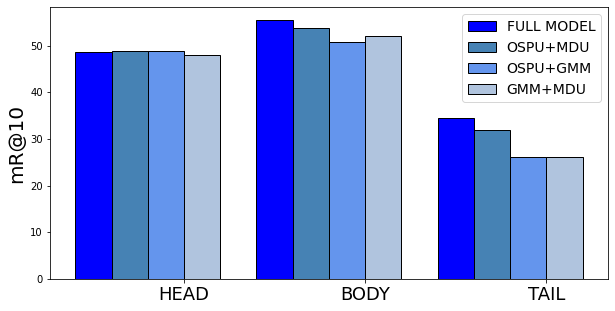

In [153]:
from matplotlib import pyplot as plt



# Numbers of pairs of bars you want
N = 3
print('row4 ',row_4_dict)
print('row2 ',row_2_dict)
print('row1 ',row_1_dict)
print('row3 ',row_3_dict)

row_4_dict_= row_4_dict
row_2_dict_= row_2_dict
row_1_dict_= row_1_dict
row_3_dict_= row_3_dict
# Data on X-axis
row_1_dict_['head'] = row_1_dict_['head']-0.5
row_1_dict_['body'] = row_1_dict_['body']+0.5
row_2_dict_['head'] = row_2_dict_['head']-0.5
row_2_dict_['body'] = row_2_dict_['body']+0.5

print('row4_ ',row_4_dict_)
print('row2_ ',row_2_dict_)
print('row1_ ',row_1_dict_)
print('row3_ ',row_3_dict_)
# Specify the values of blue bars (height)
# row_3_dict['head'] = row_3_dict['head']+2
# row_3_dict['tail'] = row_3_dict['tail']+0.25
# row_2_dict['body'] = row_2_dict['body']+1
# row_2_dict['tail'] = row_2_dict['tail']-1

row1_plot = row_1_dict_.values()
row2_plot = row_2_dict_.values()
row3_plot = row_3_dict_.values()
row4_plot = row_4_dict_.values()

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.2     

# Plottin
plt.bar(ind, row4_plot , width, label='FULL MODEL', edgecolor = "black",color='blue')

plt.bar(ind + width, row2_plot, width, label='OSPU+MDU', edgecolor = "black",color='steelblue' )
ind = ind + width
plt.bar(ind + width, row1_plot, width, label='OSPU+GMM', edgecolor = "black",color='cornflowerblue')
ind = ind + width
plt.bar(ind + width, row3_plot, width, label='GMM+MDU', edgecolor = "black",color='lightsteelblue')


# plt.xlabel('Here goes x-axis label')
plt.ylabel('mR@10',fontsize=20)
# plt.title('Here goes title of the plot')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at t, he given locations
plt.xticks(ind + width/2 , ('HEAD', 'BODY', 'TAIL'),fontsize=18)

# Finding the best position for legends and putting it
plt.legend(loc='best',fontsize=14)
plt.show()

In [196]:
u = np.asarray([1,1,0,0,7,6])
uu = np.unique(u)
np.where(u==uu[0])

(array([2, 3]),)

In [199]:
import torch
batch_size = 2
max_obj_num = 300
feat_dim =512
obj_features = torch.zeros(batch_size,max_obj_num,feat_dim)
obj_features[0,:max_obj_num,:] = torch.ones(3,512)

RuntimeError: The expanded size of the tensor (300) must match the existing size (3) at non-singleton dimension 0.  Target sizes: [300, 512].  Tensor sizes: [3, 512]

In [21]:
import cv2
import numpy as np 
p1 = np.float32([[1,0,0],[0.5 ,1, 0],[0,0,1]])
i = cv2.imread('/home/eegrad/snag/Desktop/new_block.png')
import matplotlib.pyplot as plt

row,col,_ = i.shape
matrix = cv2.getAffineTransform(p1,p1)

error: OpenCV(4.5.5) /io/opencv/modules/imgproc/src/imgwarp.cpp:3399: error: (-215:Assertion failed) src.checkVector(2, CV_32F) == 3 && dst.checkVector(2, CV_32F) == 3 in function 'getAffineTransform'
